In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
vocabulary = []
with open('vocab.nips.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
vocabulary

['a2i',
 'aaa',
 'aaai',
 'aapo',
 'aat',
 'aazhang',
 'abandonment',
 'abbott',
 'abbreviated',
 'abcde',
 'abe',
 'abeles',
 'abi',
 'abilistic',
 'abilities',
 'ability',
 'abl',
 'able',
 'ables',
 'ablex',
 'ably',
 'abnormal',
 'abort',
 'abound',
 'abramowicz',
 'abrash',
 'abrupt',
 'abruptly',
 'abscissa',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstr',
 'abstract',
 'abstracted',
 'abstraction',
 'abu',
 'abundances',
 'aca',
 'acad',
 'academic',
 'academy',
 'acc',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accent',
 'accept',
 'acceptable',
 'acceptably',
 'acceptance',
 'accepted',
 'accepting',
 'acceptor',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accommodate',
 'accommodated',
 'accomodate',
 'accompanied',
 'accompanying',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accord',
 'accordance',
 'according',
 'account',
 'accounted',
 'accounting',


In [68]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
#?np.zeros

x_mat = np.zeros((1500,12419))
with open('docword.nips.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:
        content = doc.split(' ')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(1500, 12419)

In [71]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=10
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 33925)

In [6]:
x_mat

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [152]:
totalClust=15
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint


(15, 31494)


0.99999999999999944

In [153]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
while(trace_Q > treshold):
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)


ESTEP


KeyboardInterrupt: 

In [38]:
p_jk[1,].sum()

1.0

In [39]:
npvoc = np.array(vocabulary)

In [51]:
npvoc[np.argsort(-p_jk)]

array([['network', 'model', 'data', ..., 'flicker', 'fogel', 'zwislocki'],
       ['network', 'model', 'learning', ..., 'loess', 'lives', 'zwislocki'],
       ['network', 'neuron', 'function', ..., 'latent', 'lea', 'zwislocki'],
       ..., 
       ['learning', 'function', 'algorithm', ..., 'innate', 'injected',
        'zwislocki'],
       ['learning', 'rules', 'examples', ..., 'helsinki', 'hemisphere',
        'zwislocki'],
       ['cell', 'direction', 'model', ..., 'illus', 'ild', 'zwislocki']], 
      dtype='<U23')

<Container object of 30 artists>

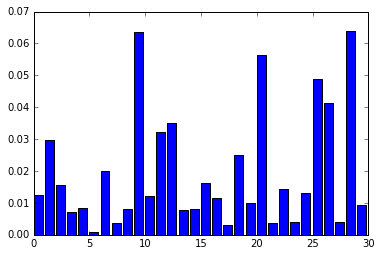

In [64]:
plt.bar(range(totalClust),pi_j)

In [69]:
# this is slow, better using first algorithm
import math, random, copy
import numpy as np
import sys
from scipy import misc
from scipy.spatial import distance
from scipy.cluster.vq import vq, kmeans, whiten
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt


def expectation_maximization(x, nbclusters, nbiter=30, epsilon=0.0001):

    def closest_cluster(words_for_doc, mus, nbclusters):
        distances = np.zeros((nbclusters,))
        for j in range(nbclusters):
            distances[j] = distance.euclidean(words_for_doc, mus[j])
        return np.argmin(distances)

    def calculate_q(x, nbclusters, mus, pies, w):
        sigma = 0
        for j in range(nbclusters):
            inner_prod = x*np.log(mus[j])
            sum = inner_prod + math.log(pies[j])
            sigma += sum*w[:,j,np.newaxis]
        return np.sum(sigma)


    #E step, compute w_i,j
    #vector of pies - pies - [j]
    #vector of mus - mus - [j,k]
    #x - [i,k]
    #w should be [i,j]
    #logA - [i,j]
    #logA_max - [i,1]
    #logY - log(w_ij)
    def e_step(x, nbclusters, mus, pies):
        logA = np.zeros((x.shape[0], nbclusters))
        for j in range(nbclusters):
            sigma = x*np.log(mus[j])
            logA[:,j] = np.log(pies[j]) + np.sum(sigma, axis=1)
        logA_max = np.zeros((x.shape[0],))
        logA.max(axis=1, out=logA_max)
        sum=0
        for j in range(nbclusters):
            sum += np.exp(logA[:,j] - logA_max)
        term3 = np.log(sum)
        logY = np.zeros((x.shape[0], nbclusters))
        for j in range(nbclusters):
            logY[:,j] = logA[:,j] - logA_max - term3
        y = np.exp(logY)
        w = y
        return w


    def m_step(x, w, nbclusters):
        new_mus = np.zeros((nbclusters, x.shape[1]))
        new_pies = np.zeros((nbclusters))
        for j in range(nbclusters):
            den = np.sum(np.sum(x, axis=1)*w[:,j])
            num = np.sum(x*w[:,j,np.newaxis], axis=0)
            new_mus[j] = num/den
            new_pies[j] = np.sum(w[:,j])/1500
        new_new_mus = np.zeros((nbclusters, x.shape[1]))
        for j in range(nbclusters):
            new_new_mus[j] = (new_mus[j]+.0001)/(np.sum(new_mus[j])+new_mus.shape[1]/10000)
        return new_new_mus, new_pies


    #USE K-MEANS TO GET INITIAL CENTERS
    centroids, distortion = kmeans(x,k_or_guess=nbclusters, iter=5)
    #normalizes ps ie mus
    mus = np.zeros((nbclusters, centroids.shape[1]))
    for j in range(nbclusters):
        mus[j] = (centroids[j]+.0001)/(np.sum(centroids[j])+centroids.shape[1]/10000)

    pies = np.full((nbclusters), 1.0/nbclusters)
    iter = 0
    difference = 10000
    old_q = 0
    q = 0
    while iter < 30 and difference > epsilon:
        iter += 1
        print("running iteration " + str(iter))
        w = e_step(x, nbclusters, mus, pies)
        mus, pies = m_step(x, w, nbclusters)
        old_q = q
        q = calculate_q(x, nbclusters, mus, pies, w)
        difference = abs(q-old_q)/abs(q)
        print("Difference in quality is " + str(difference))

    result = {}
    result['clusters'] = {}
    result['params'] = {}
    for i in range(nbclusters):
        result['params'][i] = {}
        result['params'][i]['pi'] = pies[i]
        result['params'][i]['mu'] = mus[i]
    for index, words_for_doc in enumerate(x):
        cluster = closest_cluster(words_for_doc, mus, nbclusters)
        if cluster not in result['clusters']:
            result['clusters'][cluster]=[]
        result['clusters'][cluster].append(index)

    #find top 10 words for each cluster
    """
    print ""
    print "top 10 words for each cluster"
    data = [line.strip() for line in open("vocab.nips.txt", 'r')]
    for i in xrange(nbclusters):
        top10 = result['params'][i]['mu'].argsort()[-10:][::-1]
        top10_words = [data[index] for index in top10]
        print top10_words
    """
    return result


In [72]:
test = expectation_maximization(x_mat,30)

running iteration 1


KeyboardInterrupt: 

In [154]:
#x_mat = np.matrix(np.tile(np.random.randint(1000),(50,50)))
totalClust=15
#?np.zeros

x_mat = np.zeros((20001,31494))
with open('feat-obs.txt','r') as docfile:
    # skip 3 lines
    for i in range(3):
        next(docfile)
    for doc in docfile:        
        content = doc.split(',')
        x_mat[int(content[0])-1,int(content[1])-1] = int(content[2])
    
x_mat.shape

(20001, 31494)

In [155]:
# calculate cluster center using kmeans for initialization
centroids, distortion = kmeans(x_mat,k_or_guess=totalClust, iter=5)
#normalizes ps ie mus
mus = np.zeros((totalClust, centroids.shape[1]))
for j in range(totalClust):
    mus[j] = (centroids[j]+.0001)/(np.sum(centroids[j])+centroids.shape[1]/10000)

In [156]:
# total clusters
j=totalClust
# total documents
i=x_mat.shape[0]
# total vocabularies
k=x_mat.shape[1]

# initialize pi_j matrix with same probability
pi_j = np.repeat(1/j,j)

# prepare words probability for each clusters and documents
p_jk = np.matrix(np.tile(1/k,(j,k)))
# prepare w_ij matrix initialize
w_ij = np.matrix(np.tile(0,(i,j)))

# init random for p_jk
"""
sample = [np.random.randint(0,high=i) for x in range(j)]
p_jk = x_mat[sample,]
"""
# initialize using kmeans
p_jk = mus

# small values to avoid log(0)
epsilon = 1e-7

p_jk = p_jk + epsilon
# normalize p_jk so the probability will be equal one
#p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
print(p_jk.shape)
p_jk = np.reshape(p_jk,(j,k))
# test normalize function
p_jk[1,].sum()

#np.asarray(p_jk[1,]/p_jk[1,].sum())
#np.apply_along_axis(lambda x: x,p_jk,0)

#?np.random.randint

(15, 31494)


1.0

In [157]:
trace_Q = 100
old_Q = 0
treshold = 1e-4
count = 0
max_iter = 20
while(trace_Q > treshold and count<max_iter):
    count+=1
    sum_Qpart = 0
    print('ESTEP')
    for iTrace in range(i):
        w_ij_coll = []
        for jTrace in range(j):
            #print(x_mat[iTrace,].shape)
            #print(p_jk[jTrace,].shape)
            #print(x_mat[iTrace,].dot(np.log(p_jk[jTrace,])))
            w_ij_ex = x_mat[iTrace,].dot(np.log(p_jk[jTrace,])) + np.log(pi_j[jTrace])
            sum_Qpart = sum_Qpart + w_ij_ex
            #print(w_ij_ex.shape)
            w_ij_coll.append(w_ij_ex)
            w_ij[iTrace,jTrace] = w_ij_ex
        # normalize w_ij
        max_w_ij = max(w_ij_coll)
        w_ij[iTrace,] = w_ij[iTrace,] - max_w_ij - np.log(np.sum(np.exp(w_ij[iTrace,]-max_w_ij)))

    print('MSTEP')
    for jTrace in range(j):
        #print(jTrace)
        sigmaXiWij = np.zeros(k)
        sigmaWij = 0
        sigmaXi1wij = 0
        for iTrace in range(i):
            sigmaXiWij = sigmaXiWij + x_mat[iTrace,] * np.exp(w_ij[iTrace,jTrace])
            sigmaXi1wij = sigmaXi1wij + (x_mat[iTrace,].dot(np.ones(k))) * np.exp(w_ij[iTrace,jTrace])
            sigmaWij = sigmaWij + np.exp(w_ij[iTrace,jTrace])
        p_jk[jTrace,] = sigmaXiWij / sigmaXi1wij
        pi_j[jTrace] = sigmaWij / k

    # normalize
    p_jk = p_jk + epsilon
    # normalize p_jk so the probability will be equal one
    #p_jk = [p_jk[x,]/sum(p_jk[x,]) for x in range(j)]
    p_jk = np.asarray([np.asarray(p_jk[x,]/p_jk[x,].sum()) for x in range(j)])
    #print(p_jk.shape)
    p_jk = np.reshape(p_jk,(j,k))
    # test normalize function
    #p_jk[1,].sum()
    
    #calculate the Q change
    new_Q = (sum_Qpart*(w_ij)).sum()
    #print(new_Q)
    trace_Q = abs((old_Q-new_Q)/new_Q)
    old_Q = new_Q
    #print(trace_Q.shape)
    print(trace_Q)

ESTEP
MSTEP
1.0
ESTEP
MSTEP
0.331896710601
ESTEP
MSTEP
0.0138953272681
ESTEP
MSTEP
0.000900901172858
ESTEP
MSTEP
0.000337840116263
ESTEP
MSTEP
8.98778915622e-05


<Container object of 15 artists>

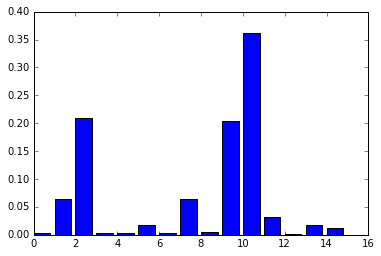

In [158]:
plt.bar(range(totalClust),pi_j/sum(pi_j))

In [159]:
vocabulary = []
with open('words-obs.txt','r') as vocfile:    
    for voc in vocfile:
        voc = voc.replace('\n','')
        vocabulary.append(voc)
npvoc = np.array(vocabulary)

In [186]:
npvoc[np.argsort(-p_jk)].shape
npvoc[np.argsort(-p_jk)][:,0:10]
npvoc.

array([['mars', 'jihad', 'lose', 'bureaucratic', 'para', 'world',
        'gtupdate', 'voice', 'newspaper', 'grace'],
       ['know', '55', 'efficient', 'divisi', 'looking', 'karni', 'scourge',
        'su', 'declaro', 'new'],
       ['commitment', 'applaud', 'king', 'fulfill', 'peace', 'laptop',
        'infared', 'using', 'tv', 'team'],
       ['bein', 'fails', 'political', 'diaz', 'kala', 'families', 'peace',
        'barack', 'house', 'grace'],
       ['january', 'jiving', 'signs', 'silencing', 'water', 'peace',
        'mars', 'applaud', 'jihad', 'foundation'],
       ['using', 'standards', 'british', 'tv', 'electricity', 'history',
        'aimed', 'water', 'infared', 'jiving'],
       ['journal', 'involves', 'stairway', 'drilling', 'establishment',
        'precipitate', 'save', 'company', 'decline', 'infared'],
       ['history', 'values', 'para', 'mars', 'applaud', 'peace',
        'believed', 'generational', 'truthful', 'burden'],
       ['game', 'bureaucratic', 'heartiest', 

In [149]:
import pickle

In [187]:
em_results = {}
em_results['pi_j'] = pi_j
em_results['p_init'] = mus
em_results['p_jk'] = p_jk
em_results['w_ij'] = w_ij
em_results['cluster'] = totalClust
pickle.dump( em_results, open( "em_results_15b.p", "wb" ) )


In [98]:
np.sort(-p_jk)

array([[ -9.74136558e-03,  -9.58132917e-03,  -8.46137176e-03, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -3.45228588e-02,  -3.27734599e-02,  -2.33285546e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -4.80845895e-02,  -3.49780309e-02,  -3.48804644e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       ..., 
       [ -5.05844318e-02,  -3.90146112e-02,  -3.14807745e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -2.40751585e-02,  -1.63028954e-02,  -1.02367388e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08],
       [ -6.37309710e-02,  -4.01065963e-02,  -3.35137475e-02, ...,
         -9.96618970e-08,  -9.96618970e-08,  -9.96618970e-08]])

In [99]:
import pandas as pd

In [104]:
ex_feature = pd.read_csv('ex-feature.txt',header=None,names=['doc','word','total'])

In [112]:
np.mean(ex_feature.groupby('doc')['total'].sum())

10.79320567456993

In [126]:
sum_dist = ex_feature.groupby('doc')['total'].sum()

In [127]:
sum_dist[sum_dist<100].std()

13.28447405993878

In [139]:
sum_dist[sum_dist<100].count()

4300938

(array([  3.68950100e+06,   4.28476000e+05,   1.22328000e+05,
          4.36620000e+04,   1.69710000e+04,   8.36100000e+03,
          4.31000000e+03,   2.18600000e+03,   1.21000000e+03,
          8.27000000e+02]),
 array([   1. ,   20.8,   40.6,   60.4,   80.2,  100. ,  119.8,  139.6,
         159.4,  179.2,  199. ]),
 <a list of 10 Patch objects>)

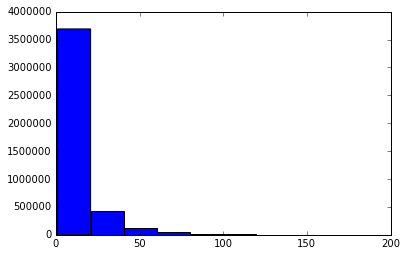

In [132]:
plt.hist(sum_dist[sum_dist<200].values)

In [188]:
npvoc.arg

In [190]:
p_jk.shape

(15, 31494)

In [219]:
p_jk[:,[101,10,100,12]].sum(axis=1)
test = p_jk[:,[1,10,1,12]].sum(axis=1)
max(test / test.sum())

0.19600750604320424

In [224]:
aha = [[123],[345],[565]]

array([[123, 345, 565]])